In [ ]:
import pandas as pd
import numpy as np
import surprise

In [ ]:
!pip install surprise

In [ ]:
ratings=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/ratings.csv')
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
reader=Reader(rating_scale=(1,5))

data=Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

sim_options = {'user_based':True, 'name':'cosine'}

model= KNNWithMeans(sim_options = sim_options)
model.fit(data.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
user_recommend = 1 # Recommend movies to user 1
movies_ids = ratings['movieId'].unique()
predicted_ratings = pd.DataFrame(columns=['userId','movieId','rating'])

for mid in movies_ids:
  user_mid = ratings[(ratings['userId']==user_recommend) &
                     (ratings['movieId']==mid)]
  is_rated = True if len(user_mid)>0 else False
  if not is_rated:
    curr={'userId':user_recommend,
          'movieId':mid,
          'rating':model.predict(user_recommend,mid)[3]}
    predicted_ratings = predicted_ratings.append(curr, ignore_index=True)
predicted_ratings.head()


,userId,movieId,rating
0,1.0,10.0,2.412508
1,1.0,17.0,2.940658
2,1.0,39.0,2.491161
3,1.0,47.0,2.780496
4,1.0,50.0,3.223499


In [ ]:
predicted_ratings.sort_values("rating", ascending=False).head(3)

,userId,movieId,rating
4708,1.0,107559.0,5.000000
8448,1.0,91104.0,5.000000
5714,1.0,3216.0,4.936834


In [ ]:
user_recommend   # Recommend movies to user 1
movies_ids = ratings['movieId'].unique()
predicted_ratings = pd.DataFrame(columns=['userId','movieId','rating'])

for mid in movies_ids:
  user_mid = ratings[(ratings['userId']==user_recommend) &
                     (ratings['movieId']==mid)]
  is_rated = True if len(user_mid)>0 else False
  if not is_rated:
    curr={'userId':user_recommend,
          'movieId':mid,
          'rating':model.predict(user_recommend,mid)[3]}
    predicted_ratings = predicted_ratings.append(curr, ignore_index=True)
predicted_ratings.head()

,userId,movieId,rating
0,1.0,10.0,2.412508
1,1.0,17.0,2.940658
2,1.0,39.0,2.491161
3,1.0,47.0,2.780496
4,1.0,50.0,3.223499


In [ ]:
# ITEM BASED

In [ ]:
sim_options = {'user_based':True, 'name':'cosine'}

model= KNNWithMeans(sim_options = sim_options)
model.fit(data.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF


In [ ]:
model=NMF()
model.fit(data.build_full_trainset())
model.predict(1,1)

Prediction(uid=1, iid=1, r_ui=None, est=2.4363303863696792, details={'was_impossible': False})

In [ ]:
# gradient descent

In [ ]:
import pandas as pd
adv=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/Advertising.csv')
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
m_old=0.5
c_old=2
yhat=m_old *adv['TV'] +c_old
error=adv['sales']-yhat
sq_error = error.apply(lambda v:np.square(v))
sse = 1/adv.shape[0] * sq_error.sum()
sse

5294.067537499999

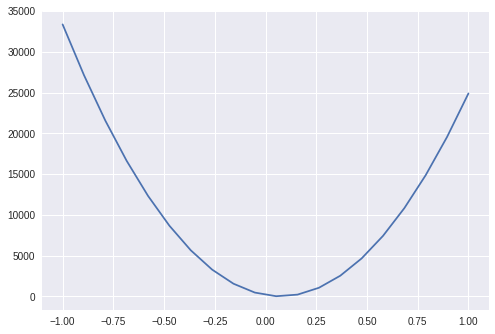

In [ ]:
sse_all=[]
slopes=[]
for m_old in np.linspace(-1,1,20):
  c_old=2
  yhat=m_old *adv['TV'] +c_old
  error=adv['sales']-yhat
  sq_error = error.apply(lambda v:np.square(v))
  sse = 1/adv.shape[0] * sq_error.sum()
  sse_all.append(sse)
  slopes.append(m_old)
import matplotlib.pyplot as plt
plt.plot(slopes,sse_all)  